In [78]:
import numpy as np
import pandas as pd
import yfinance as yf 
import ta

In [79]:
# Fetch data
ticker = "nvda"  # Replace with your desired stock ticker
data = yf.download(ticker, start="2024-01-01", end="2040-12-31")

# Preview data
print(data.head())


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           NVDA       NVDA       NVDA       NVDA       NVDA
Date                                                             
2024-01-02  48.154346  49.281026  47.581511  49.230042  411254000
2024-01-03  47.555515  48.170339  47.306585  47.471539  320896000
2024-01-04  47.984398  48.486255  47.494535  47.753461  306535000
2024-01-05  49.083080  49.532953  48.292304  48.448262  415039000
2024-01-08  52.238182  52.260179  49.464970  49.497962  642510000


In [80]:
data['Close'] = data['Close'].astype(float)  # Ensure it's float

In [81]:
from ta.volatility import BollingerBands
from ta.trend import EMAIndicator

# Ensure 'Close' is a pandas Series and has no NaN values
close_prices = data['Close'].astype(float)

# Calculate Bollinger Bands
bb = BollingerBands(close=close_prices, window=20, window_dev=2)

# Debug: Inspect the shape of the raw attribute
print("Shape of _hband:", bb._hband.shape)



Shape of _hband: (251, 1)


In [82]:
from ta.volatility import BollingerBands

# Ensure 'Close' is a pandas Series and has no NaN values
close_prices = data['Close'].astype(float)

# Calculate Bollinger Bands
bb = BollingerBands(close=close_prices, window=20, window_dev=2)

# Use the internal attributes and flatten them
data['bb_high'] = pd.Series(bb._hband.squeeze(), index=data.index)  # Upper band
data['bb_low'] = pd.Series(bb._lband.squeeze(), index=data.index)   # Lower band
data['bb_middle'] = pd.Series(bb._mavg.squeeze(), index=data.index) # Middle band

# Preview the DataFrame
print(data[['Close', 'bb_high', 'bb_low', 'bb_middle']].head())

Price           Close bb_high bb_low bb_middle
Ticker           NVDA                         
Date                                          
2024-01-02  48.154346     NaN    NaN       NaN
2024-01-03  47.555515     NaN    NaN       NaN
2024-01-04  47.984398     NaN    NaN       NaN
2024-01-05  49.083080     NaN    NaN       NaN
2024-01-08  52.238182     NaN    NaN       NaN


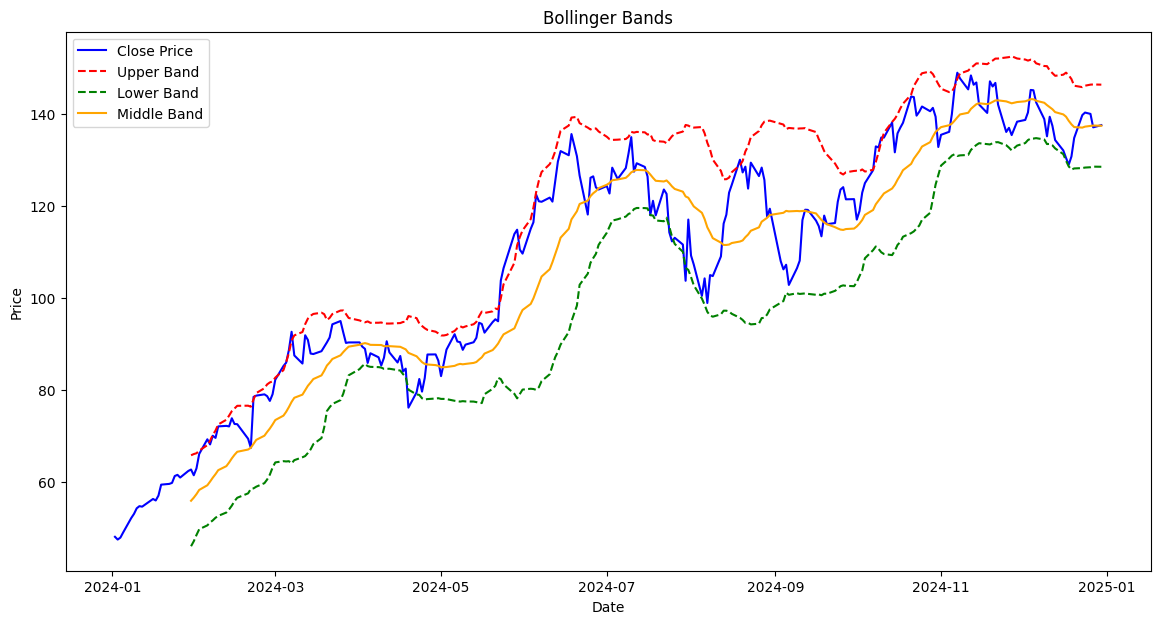

In [83]:
import matplotlib.pyplot as plt

# Plot Close prices and Bollinger Bands
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Close'], label='Close Price', color='blue')
plt.plot(data.index, data['bb_high'], label='Upper Band', linestyle='--', color='red')
plt.plot(data.index, data['bb_low'], label='Lower Band', linestyle='--', color='green')
plt.plot(data.index, data['bb_middle'], label='Middle Band', linestyle='-', color='orange')

plt.title("Bollinger Bands")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()
